# Phase 4 Project Submission
- Student name: Alec Schonfeld
- Student pace: self paced
- Scheduled project review date/time:
- Instructor name: Mark


---

# Business Understanding

We will be evaluating zillow real estate data with the intent of finding the best 5 zip codes to invest in based on a time-series analysis

- The data is from Zillow and ranges from 1986 - 2018 for all real estate sales in that time period across North America

---

# Data Understanding

In [50]:
# Import necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
plt.style.use('seaborn-v0_8-darkgrid')

In [51]:
# Load dataset and read it 
df = pd.read_csv(r"C:\Users\alecs\OneDrive\Desktop\Flatiron School\Phase 4 Project\zillow_price_analysis\zillow_data.csv")
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [52]:
# convert dataset to long format 
df_long = pd.melt(
    df,
    id_vars = ['RegionID','RegionName','City','State','Metro','CountyName','SizeRank'],
    var_name = 'Time',
    value_name = 'Value'
    )

df_long

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,Time,Value
0,84654,60657,Chicago,IL,Chicago,Cook,1,1996-04,334200.0
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,1996-04,235700.0
2,91982,77494,Katy,TX,Houston,Harris,3,1996-04,210400.0
3,84616,60614,Chicago,IL,Chicago,Cook,4,1996-04,498100.0
4,93144,79936,El Paso,TX,El Paso,El Paso,5,1996-04,77300.0
...,...,...,...,...,...,...,...,...,...
3901590,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,2018-04,209300.0
3901591,59107,3293,Woodstock,NH,Claremont,Grafton,14720,2018-04,225800.0
3901592,75672,40404,Berea,KY,Richmond,Madison,14721,2018-04,133400.0
3901593,93733,81225,Mount Crested Butte,CO,NaN,Gunnison,14722,2018-04,664400.0


In [53]:
df_long.shape

(3901595, 9)

In [54]:
df_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3901595 entries, 0 to 3901594
Data columns (total 9 columns):
 #   Column      Dtype  
---  ------      -----  
 0   RegionID    int64  
 1   RegionName  int64  
 2   City        object 
 3   State       object 
 4   Metro       object 
 5   CountyName  object 
 6   SizeRank    int64  
 7   Time        object 
 8   Value       float64
dtypes: float64(1), int64(3), object(5)
memory usage: 267.9+ MB


In [55]:
df_long.describe()

,RegionID,RegionName,SizeRank,Value
count,3.901595e+06,3.901595e+06,3.901595e+06,3.744704e+06
mean,8.107501e+04,4.822235e+04,7.362000e+03,2.076064e+05
std,3.193304e+04,2.935833e+04,4.250165e+03,2.400207e+05
min,5.819600e+04,1.001000e+03,1.000000e+00,1.130000e+04
25%,6.717400e+04,2.210100e+04,3.681000e+03,9.790000e+04
50%,7.800700e+04,4.610600e+04,7.362000e+03,1.476000e+05
75%,9.092100e+04,7.520600e+04,1.104300e+04,2.372000e+05
max,7.538440e+05,9.990100e+04,1.472300e+04,1.931490e+07


In [56]:
# Rename regionname column to zipcode
df_long = df_long.rename(columns={'RegionName': 'Zip_Code'})


In [57]:
df_long.head()

,RegionID,Zip_Code,City,State,Metro,CountyName,SizeRank,Time,Value
0,84654,60657,Chicago,IL,Chicago,Cook,1,1996-04,334200.0
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,1996-04,235700.0
2,91982,77494,Katy,TX,Houston,Harris,3,1996-04,210400.0
3,84616,60614,Chicago,IL,Chicago,Cook,4,1996-04,498100.0
4,93144,79936,El Paso,TX,El Paso,El Paso,5,1996-04,77300.0


In [58]:
# Lets evaluate the distribution of data across states

df_long['State'].value_counts()

State
CA    324360
NY    268975
TX    262085
PA    220215
FL    208025
OH    155820
IL    144955
NJ    133030
MI    132235
IN    113420
NC    113420
MA    110505
TN    107060
VA    106265
MN     99375
GA     91425
WA     90365
WI     87980
MO     84535
MD     84005
CO     65985
KS     63865
AZ     60950
OR     59360
OK     58565
SC     54590
NH     52735
LA     51145
AL     48495
IA     41870
MS     40545
KY     36835
CT     32860
UT     32065
ID     29150
AR     27825
NV     27295
ME     22790
NE     21995
WV     19080
MT     18815
HI     16430
NM     15900
RI     15635
DE     10865
ND      8215
WY      8215
AK      7420
SD      5035
DC      4770
VT      4240
Name: count, dtype: int64

CA, NY, TX, PA, and FL are the most frequent states in the dataset

In [59]:
# How many different zip codes are there 

unique_zip_count = len(df_long['Zip_Code'].unique())
print(unique_zip_count)


14723


There are 14,723 different zip codes in the dataset 

In [60]:
df_long.head()

,RegionID,Zip_Code,City,State,Metro,CountyName,SizeRank,Time,Value
0,84654,60657,Chicago,IL,Chicago,Cook,1,1996-04,334200.0
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,1996-04,235700.0
2,91982,77494,Katy,TX,Houston,Harris,3,1996-04,210400.0
3,84616,60614,Chicago,IL,Chicago,Cook,4,1996-04,498100.0
4,93144,79936,El Paso,TX,El Paso,El Paso,5,1996-04,77300.0


In [61]:

# Convert the time column to a datetime dtype

df_long['Time'] = pd.to_datetime(df_long['Time'])
# set time column as the index

df_long.set_index(['Time'], inplace=True)

# sort data by the time index

df_long.sort_index(inplace=True)

In [62]:
df_long.head()

,RegionID,Zip_Code,City,State,Metro,CountyName,SizeRank,Value
Time,,,,,,,,
1996-04-01,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0
1996-04-01,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0
1996-04-01,91982,77494,Katy,TX,Houston,Harris,3,210400.0
1996-04-01,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0
1996-04-01,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0


In [63]:
df.index.value_counts()

0        1
9806     1
9808     1
9809     1
9810     1
        ..
4911     1
4912     1
4913     1
4914     1
14722    1
Name: count, Length: 14723, dtype: int64

In [64]:
print(type(df_long.index))


<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [65]:
# check for year range of the dataset 

years = df_long.index.year.unique()
print(years)


Index([1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018],
      dtype='int32', name='Time')


In [73]:
# sort states by the average value price of real estate sales

state_aggregated = df_long.groupby('State')['Value'].mean()

sorted_states = round(state_aggregated.sort_values(ascending = False),2)


sorted_states

State
DC    487971.05
CA    457429.43
HI    456644.65
NJ    325240.62
MA    322503.76
MD    264829.23
NY    264731.71
CT    260539.64
CO    258393.46
WA    246150.33
AK    241699.30
NV    239707.69
RI    237406.17
DE    235969.58
VA    225467.15
UT    214678.66
OR    209548.43
NH    203155.31
AZ    201244.29
FL    198630.97
MT    190316.98
ME    187914.46
NM    186521.38
IL    185048.06
WY    185039.54
MN    168467.77
VT    163205.35
ID    160670.61
WI    157673.27
GA    154415.54
NC    147587.93
ND    146775.21
PA    146516.68
SC    145948.78
TX    140540.60
SD    137355.43
MO    132186.05
MI    131929.67
AL    130055.04
NE    129293.73
IA    125349.38
KS    122411.43
KY    121079.79
OH    119489.14
LA    114430.39
IN    107738.77
AR    105312.72
TN    103772.72
MS    103201.64
WV    101871.64
OK     84744.78
Name: Value, dtype: float64

In [74]:
top_5_states_avg = sorted_states.head()

top_5_states_avg

State
DC    487971.05
CA    457429.43
HI    456644.65
NJ    325240.62
MA    322503.76
Name: Value, dtype: float64

Text(0, 0.5, 'State')

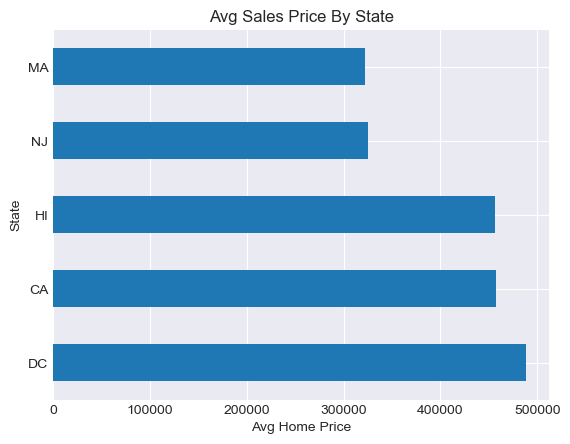

In [75]:
top_5_states_avg.plot(kind='barh')
plt.title('Avg Sales Price By State')
plt.xlabel('Avg Home Price')
plt.ylabel('State')

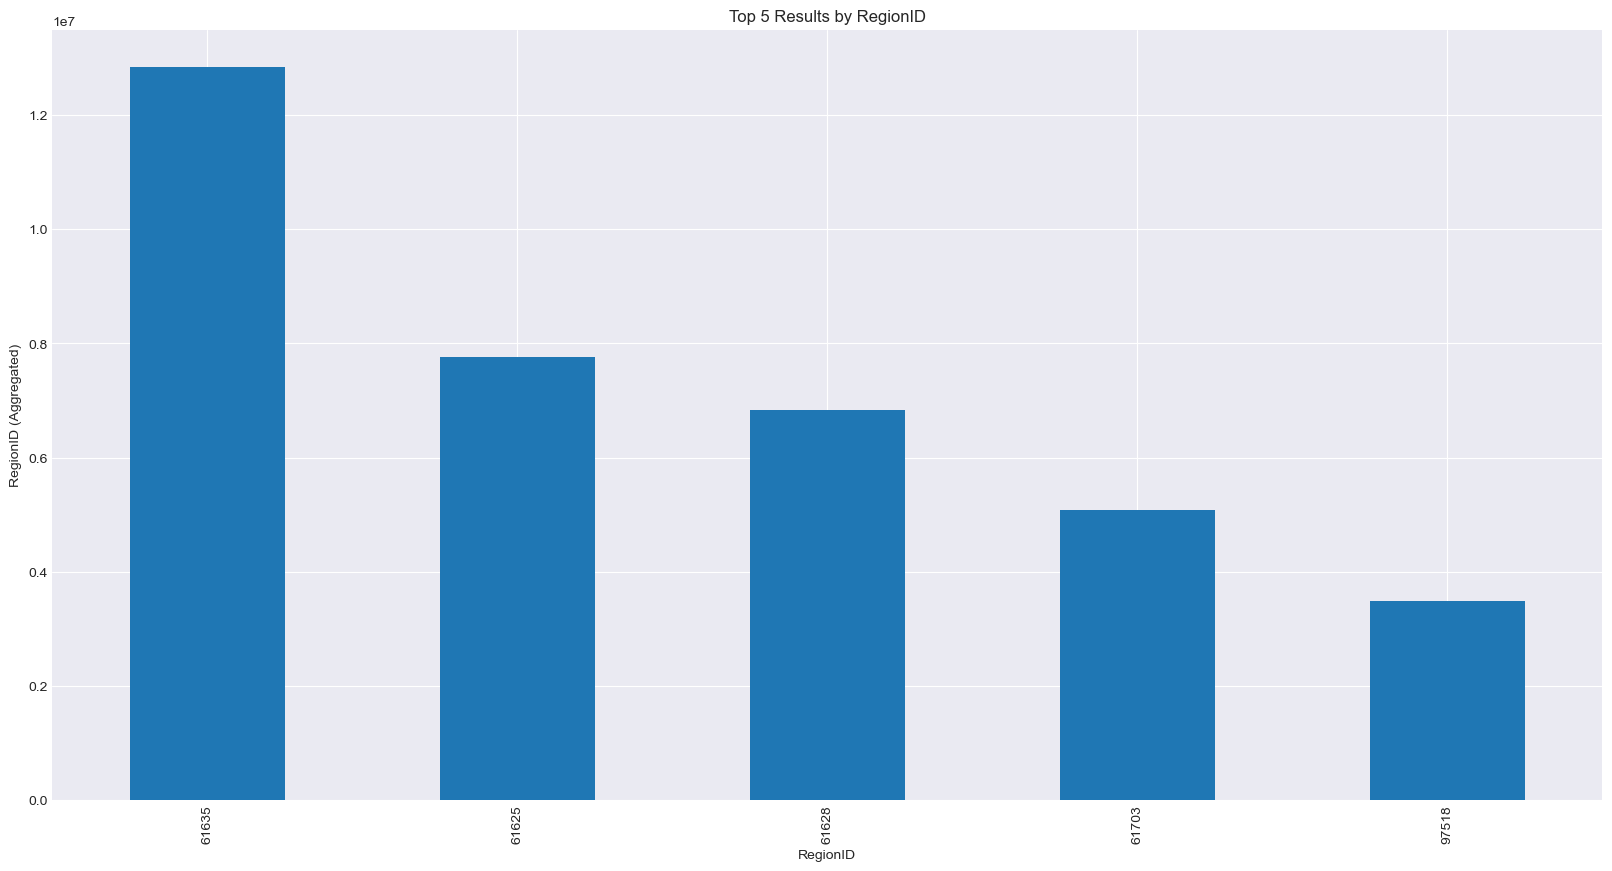

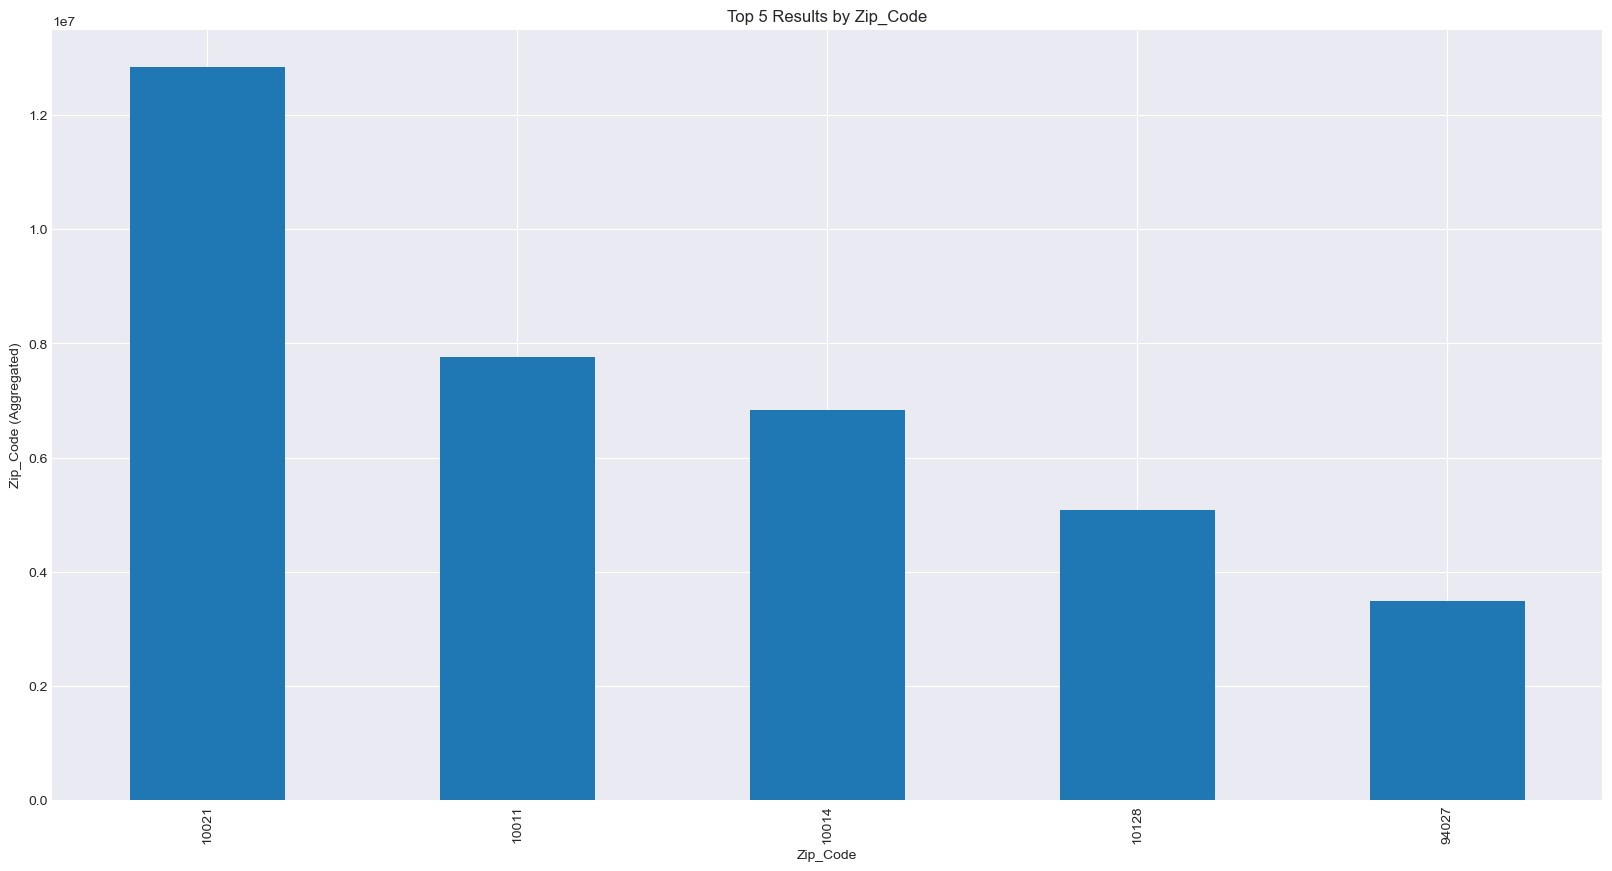

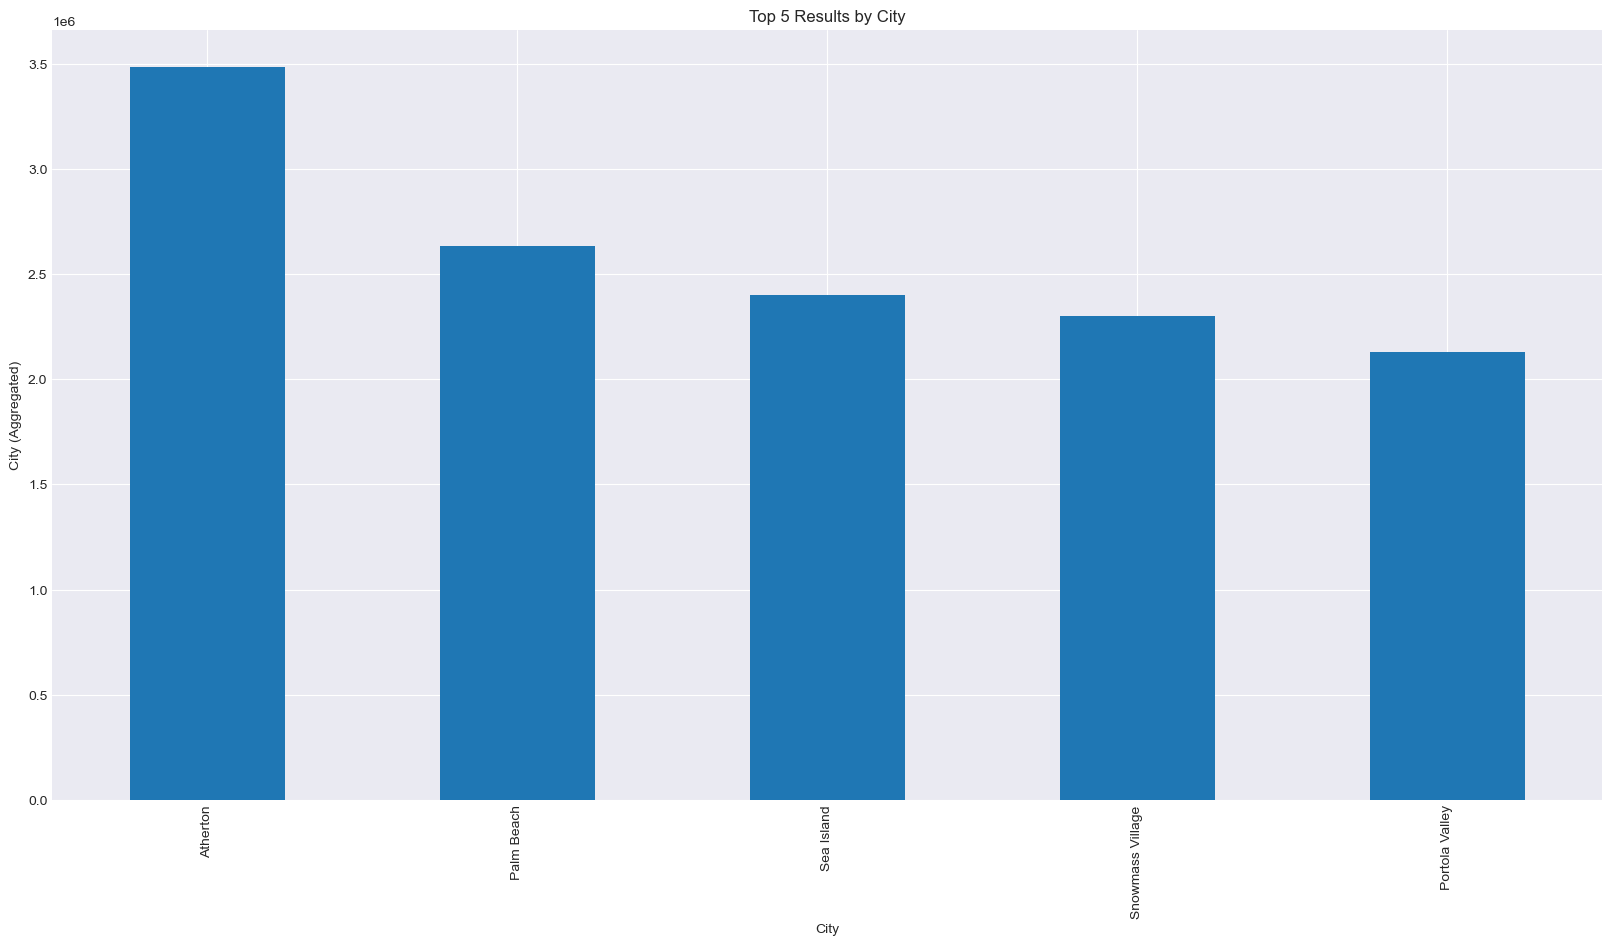

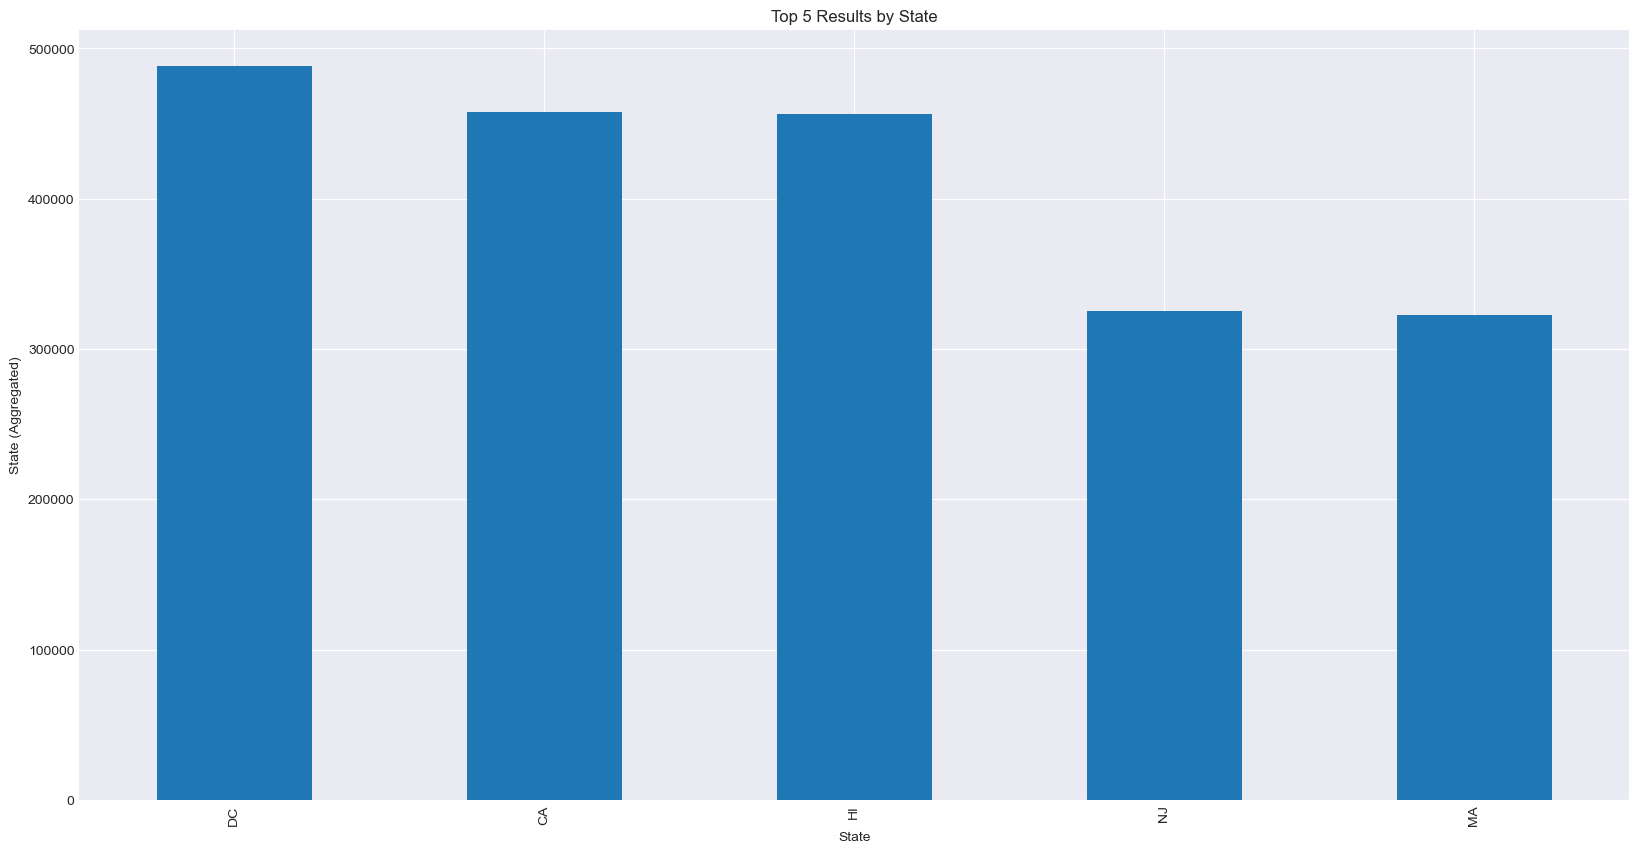

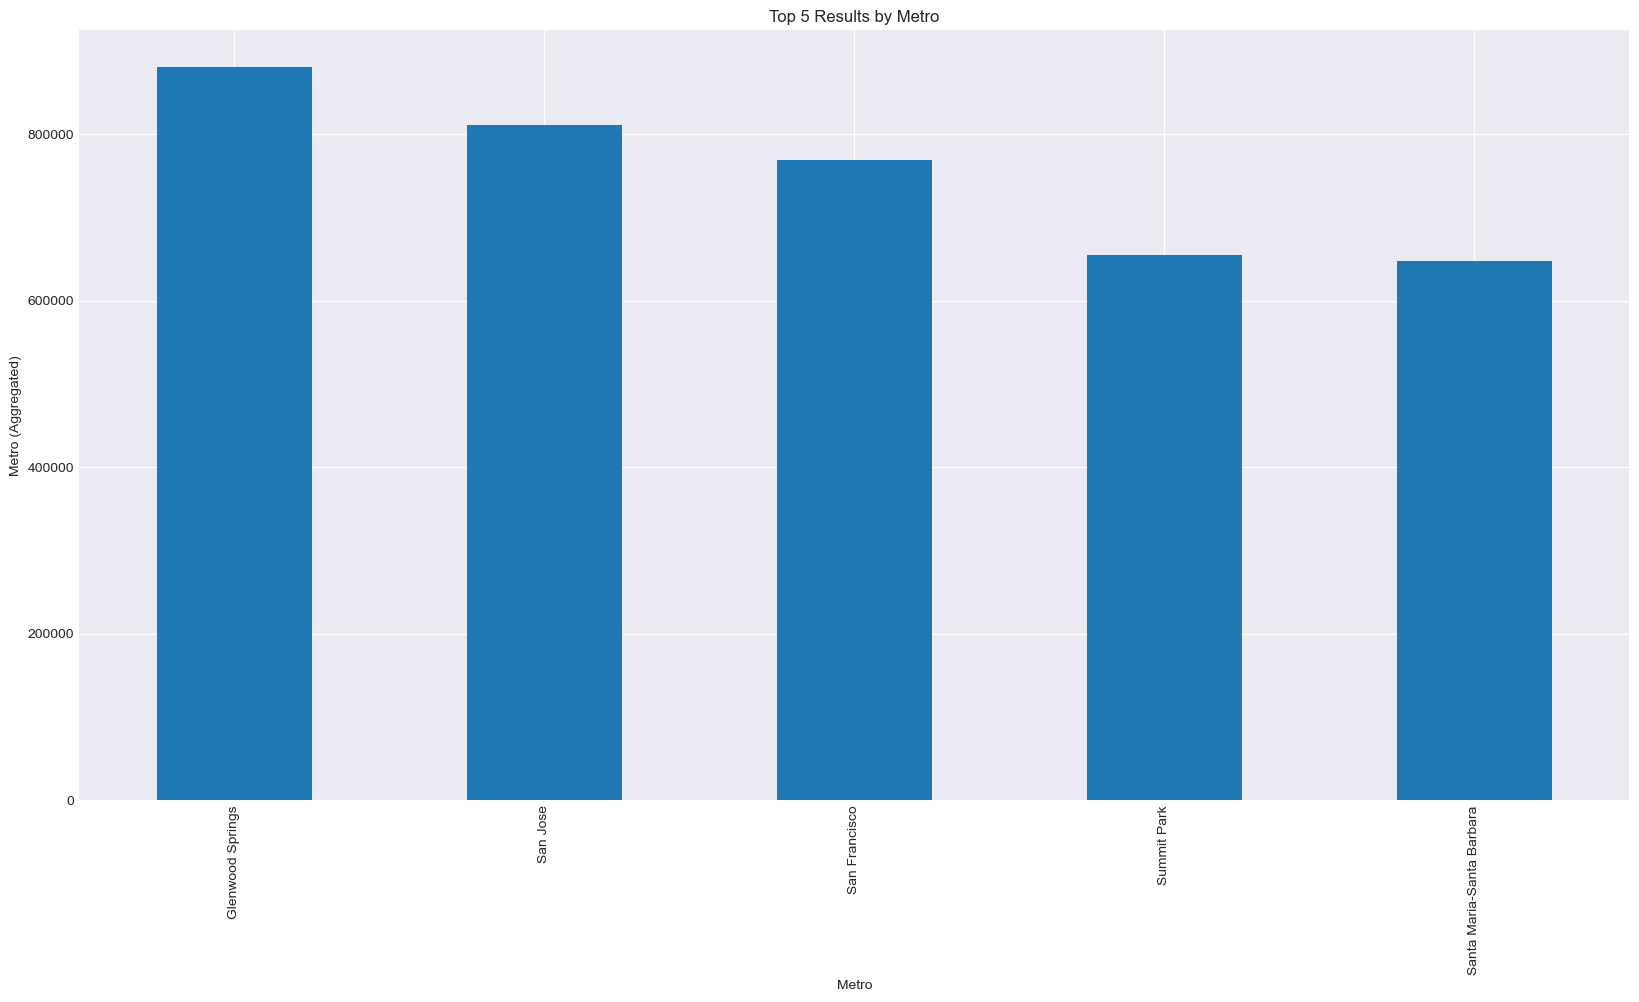

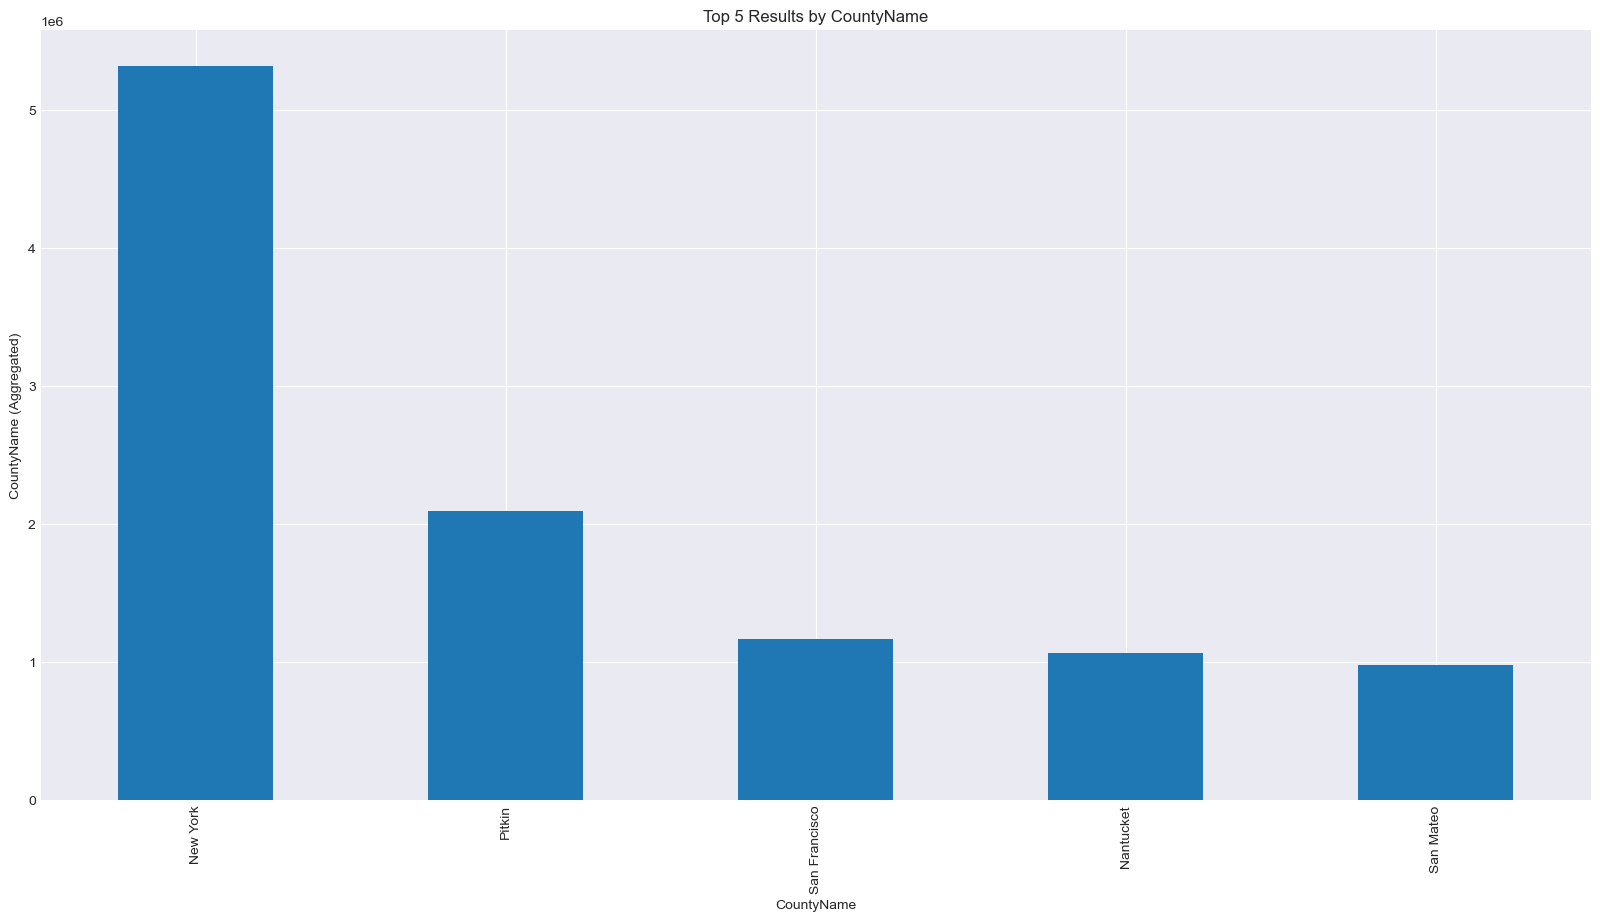

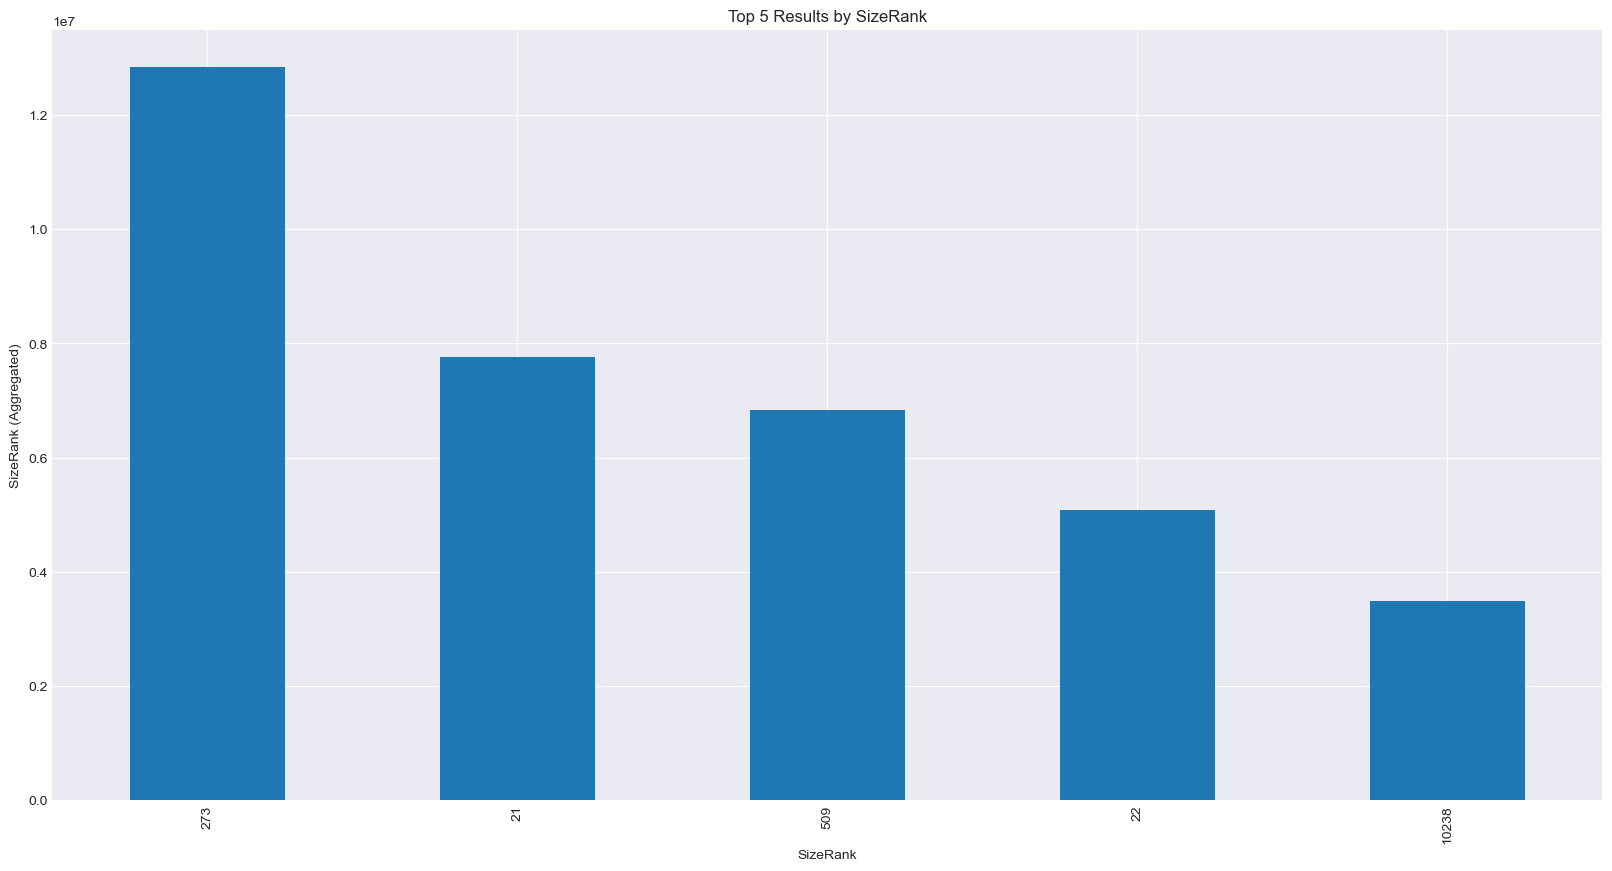

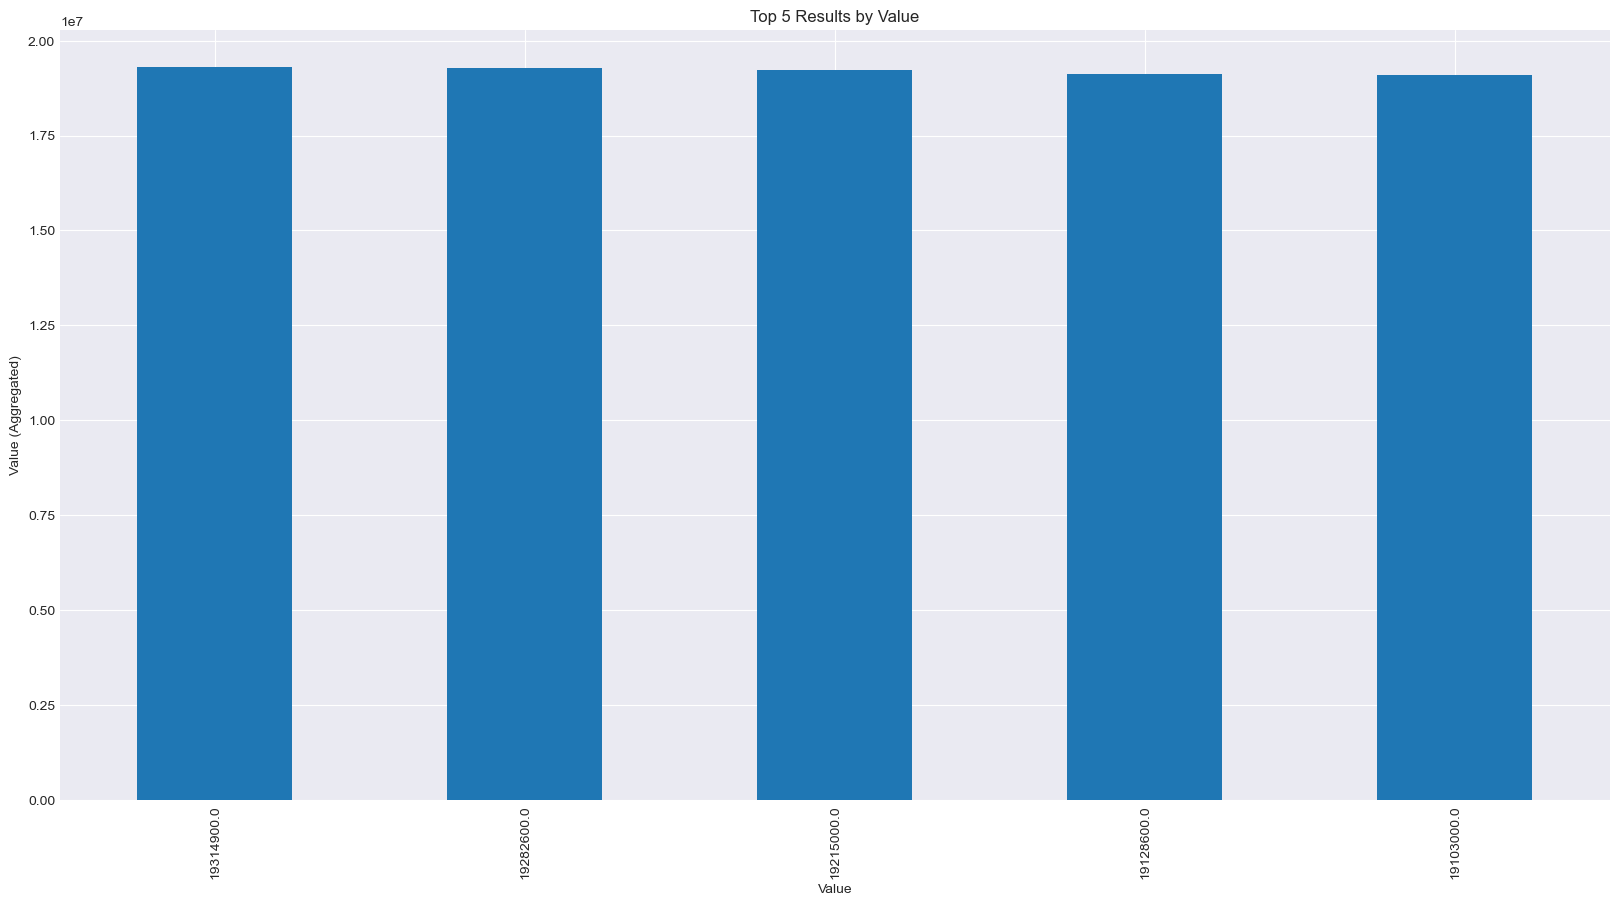

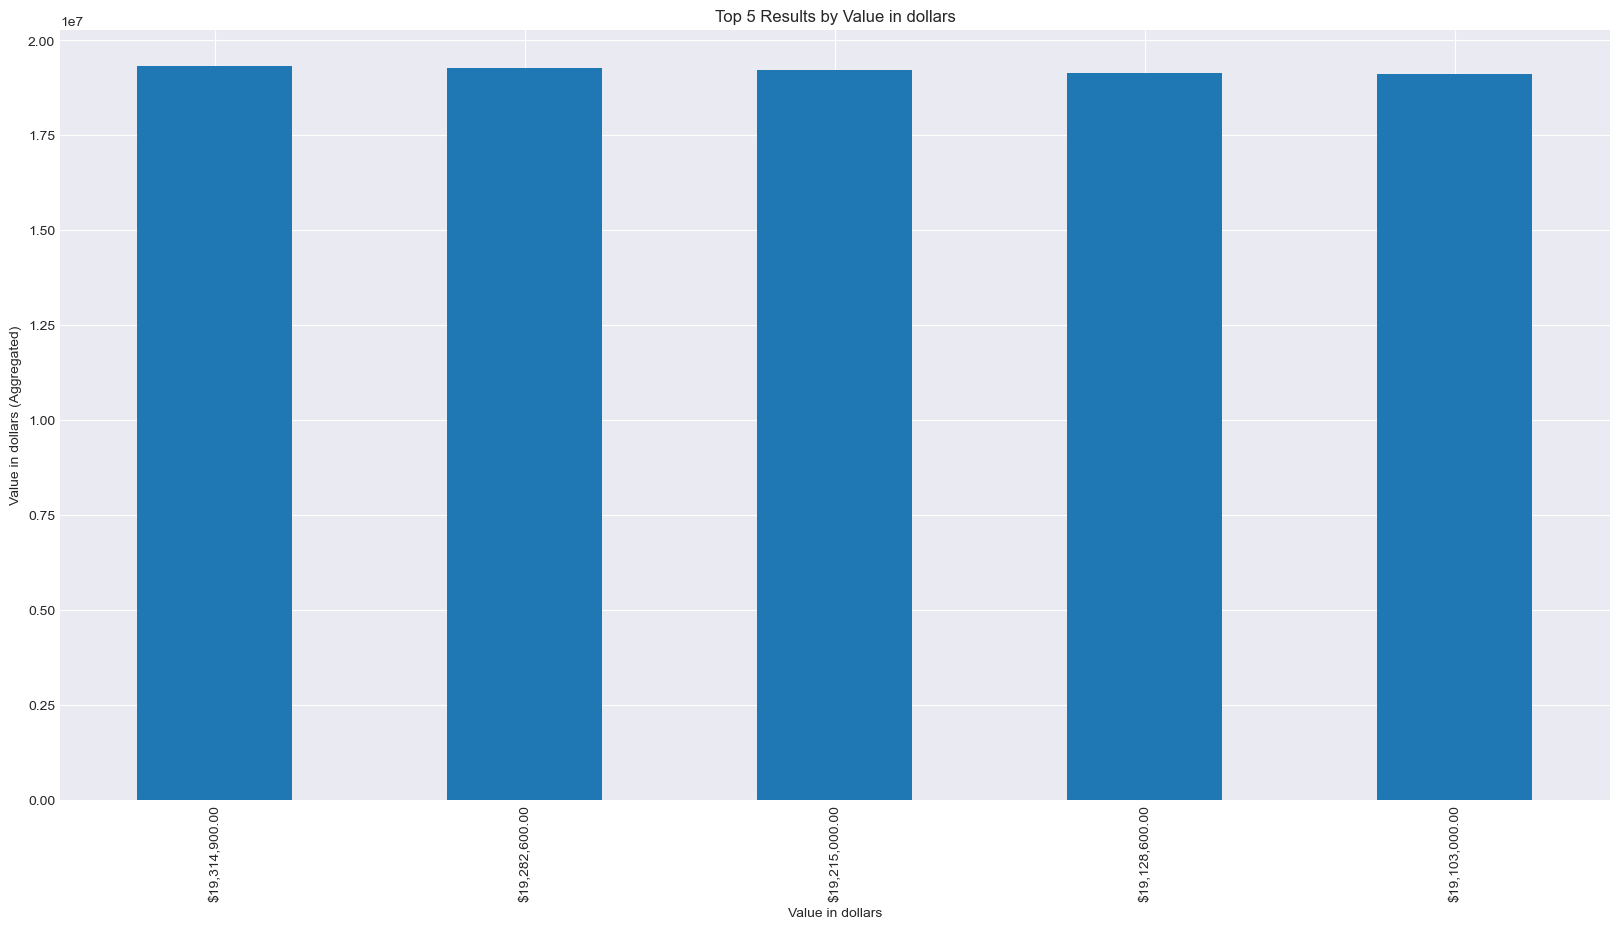

In [87]:
# View Bottom 5 states

# Step 2: Loop through each numeric column
for column in df_long:
    # Step 3: Group by 'State' and aggregate (e.g., sum)
    grouped = df_long.groupby(column)['Value'].mean().sort_values(ascending=False)
    
    # Step 4: Get the top 5 states for the current column
    top_5 = grouped.head(5)
    
    # Step 5: Plot the results
    top_5.plot(kind='bar', figsize=(20, 10))
    plt.title(f"Top 5 Results by {column}")
    plt.xlabel(f'{column}')
    plt.ylabel(f'{column} (Aggregated)')
    plt.show()

# Prepare Data for Time Series Analysis

In [92]:
df_long['Zip_Code'] = df_long['Zip_Code'].astype(str)


In [105]:
# Create a pivot view
zip_data = df_long[['Zip_Code', 'Value']]

zip_data = zip_data.dropna(subset=['Value'])
    
zip_time_series = zip_data.pivot_table(index='Time', columns='Zip_Code', values='Value')


In [107]:
# Calculating the annual growth rate

annual_growth = zip_time_series.resample('Y').last().pct_change()


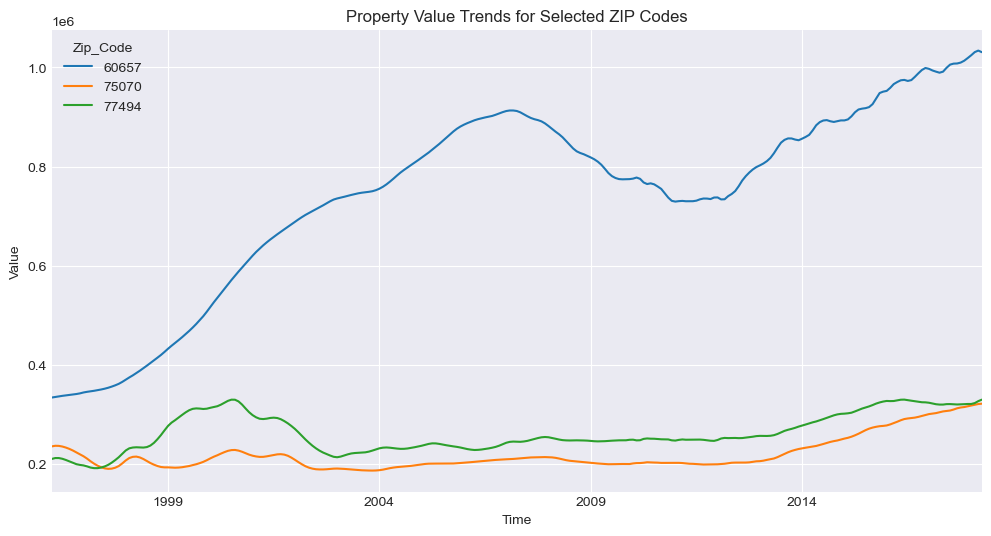

In [109]:
# Plot graph of property value in select zip codes over time

zip_time_series[['60657', '75070', '77494']].plot(figsize=(12, 6))
plt.title('Property Value Trends for Selected ZIP Codes')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()


In [98]:
# Identify growth rates of selected zip codes

growth_rates = zip_time_series.pct_change().mean()
top_growth_zip_codes = growth_rates.sort_values(ascending=False).head(10)
print(top_growth_zip_codes)


Zip_Code
27980    0.021735
30032    0.020622
80216    0.017135
89030    0.015777
94621    0.015505
43206    0.014138
30288    0.013832
89512    0.013782
32435    0.013039
95351    0.012991
dtype: float64


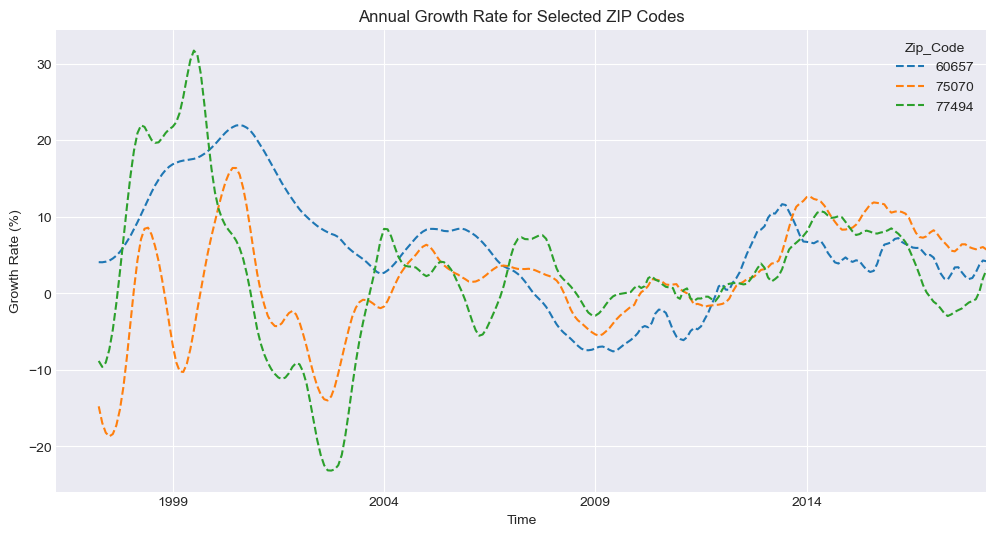

In [108]:
annual_growth_rate = zip_time_series[['60657', '75070', '77494']].pct_change(periods=12) * 100
annual_growth_rate.plot(figsize=(12, 6), linestyle='--')
plt.title('Annual Growth Rate for Selected ZIP Codes')
plt.xlabel('Time')
plt.ylabel('Growth Rate (%)')
plt.show()
